In [2]:
import pandas as pd
BitCoinTwitterDataset = pd.read_csv('C:\\Users\\prasa\\bitcoin_tweets_edited.csv')

BitCoinTwitterDataset.head(5)

,user_created,text
0,2009-04-26 20:05,Blue Ridge Bank shares halted by NYSE after #b...
1,2019-10-17 20:12,"ðŸ˜Ž Today, that's this #Thursday, we will do ..."
2,2014-11-10 10:50,"Guys evening, I have read this article about B..."
3,2019-09-28 16:48,$BTC A big chance in a billion! Price: \487264...
4,2016-02-03 13:15,This network is secured by 9 508 nodes as of t...


In [3]:
BitCoinTwitterDataset = BitCoinTwitterDataset.rename(columns={'text': 'tweets', 'user_created' : 'time'})
#BitCoinTwitterDataset = BitCoinTwitterDataset.drop(['user_name', 'user_location','user_description','user_followers','user_friends','user_favourites','user_verified', 'hashtags','source','is_retweet','date'], axis=1)*/
BitCoinTwitterDataset.head(5)


,time,tweets
0,2009-04-26 20:05,Blue Ridge Bank shares halted by NYSE after #b...
1,2019-10-17 20:12,"ðŸ˜Ž Today, that's this #Thursday, we will do ..."
2,2014-11-10 10:50,"Guys evening, I have read this article about B..."
3,2019-09-28 16:48,$BTC A big chance in a billion! Price: \487264...
4,2016-02-03 13:15,This network is secured by 9 508 nodes as of t...


In [4]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import SnowballStemmer


stemmer = nltk.SnowballStemmer("english")
STOPWORDS = stopwords.words('english')
STOPWORDS.remove('not')


def cleanText(text):
    text = str(text).lower()                                           # converting to lower case
    text = re.sub(r'@\S+|http\S+|www.\S+|\n','',text)                  # removing mentions and links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)                        # removing special characters 
    text = re.sub(r"mcdonald", "", text)
    text = [stemmer.stem(word) for word in text.split(' ')]            # stem words 
    text = " ".join([word for word in text if word not in STOPWORDS])  # remove stopwords
    text = text.strip()                                                # remove extra spaces from start and end of string
     
    return text

BitCoinTwitterDataset['tweets']= BitCoinTwitterDataset['tweets'].apply(cleanText)
BitCoinTwitterDataset.head(5)

,time,tweets
0,2009-04-26 20:05,blue ridg bank share halt nyse bitcoin atm ann...
1,2019-10-17 20:12,today thursday take 2 friend btc wallet secu...
2,2014-11-10 10:50,guy even read articl btc would like share
3,2019-09-28 16:48,btc big chanc billion price 48726440 20210211 ...
4,2016-02-03 13:15,network secur 9 508 node today soon biggest be...


In [5]:
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

BitCoinTwitterDataset['tweets']= BitCoinTwitterDataset['tweets'].apply(remove_emoji)
BitCoinTwitterDataset.head(5)

,time,tweets
0,2009-04-26 20:05,blue ridg bank share halt nyse bitcoin atm ann...
1,2019-10-17 20:12,today thursday take 2 friend btc wallet secu...
2,2014-11-10 10:50,guy even read articl btc would like share
3,2019-09-28 16:48,btc big chanc billion price 48726440 20210211 ...
4,2016-02-03 13:15,network secur 9 508 node today soon biggest be...


In [6]:
from textblob import TextBlob

#Creating a function to get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


#Creating a funtcion to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Creating two new columns
BitCoinTwitterDataset['Subjectivity'] = BitCoinTwitterDataset['tweets'].apply(getSubjectivity)
BitCoinTwitterDataset['Polarity'] = BitCoinTwitterDataset['tweets'].apply(getPolarity)

BitCoinTwitterDataset.head(5)

,time,tweets,Subjectivity,Polarity
0,2009-04-26 20:05,blue ridg bank share halt nyse bitcoin atm ann...,0.1,0.00
1,2019-10-17 20:12,today thursday take 2 friend btc wallet secu...,0.0,0.00
2,2014-11-10 10:50,guy even read articl btc would like share,0.0,0.00
3,2019-09-28 16:48,btc big chanc billion price 48726440 20210211 ...,0.1,0.00
4,2016-02-03 13:15,network secur 9 508 node today soon biggest be...,0.2,-0.25


In [7]:
BitCoinTwitterDataset['date'] = pd.to_datetime(BitCoinTwitterDataset["time"]).dt.strftime('%Y-%m-%d')
BitCoinTwitterDataset.head(5)

,time,tweets,Subjectivity,Polarity,date
0,2009-04-26 20:05,blue ridg bank share halt nyse bitcoin atm ann...,0.1,0.00,2009-04-26
1,2019-10-17 20:12,today thursday take 2 friend btc wallet secu...,0.0,0.00,2019-10-17
2,2014-11-10 10:50,guy even read articl btc would like share,0.0,0.00,2014-11-10
3,2019-09-28 16:48,btc big chanc billion price 48726440 20210211 ...,0.1,0.00,2019-09-28
4,2016-02-03 13:15,network secur 9 508 node today soon biggest be...,0.2,-0.25,2016-02-03


In [8]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
BitCoinTwitterDataset['Analysis'] = BitCoinTwitterDataset['Polarity'].apply(getAnalysis)
BitCoinTwitterDataset.head(15)

,time,tweets,Subjectivity,Polarity,date,Analysis
0,2009-04-26 20:05,blue ridg bank share halt nyse bitcoin atm ann...,0.100000,0.00,2009-04-26,Neutral
1,2019-10-17 20:12,today thursday take 2 friend btc wallet secu...,0.000000,0.00,2019-10-17,Neutral
2,2014-11-10 10:50,guy even read articl btc would like share,0.000000,0.00,2014-11-10,Neutral
3,2019-09-28 16:48,btc big chanc billion price 48726440 20210211 ...,0.100000,0.00,2019-09-28,Neutral
4,2016-02-03 13:15,network secur 9 508 node today soon biggest be...,0.200000,-0.25,2016-02-03,Negative
5,2010-01-12 7:00,trade crypto binanc enjoy cashback 10 trade f...,0.500000,0.40,2010-01-12,Positive
6,2019-12-23 16:49,ltfire amp mangtbitcoin crypto btc,0.000000,0.00,2019-12-23,Neutral
7,2018-08-03 21:30,price updat eur 1 hourbtc 370821 051 eth ...,0.000000,0.00,2018-08-03,Neutral
8,2020-11-26 23:45,btc bitcoin ethereum eth crypto cryptotrad rsr...,0.000000,0.00,2020-11-26,Neutral
9,2009-04-26 20:05,bitcoin invest revolutionari crypto firm may n...,0.400000,-0.20,2009-04-26,Negative


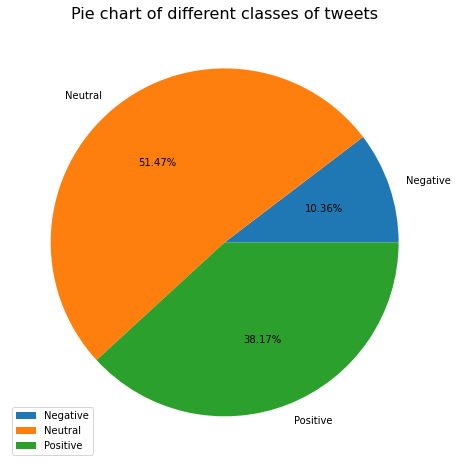

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
targets = BitCoinTwitterDataset.groupby('Analysis').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%")
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

In [10]:
tweets = BitCoinTwitterDataset[['Polarity','date']]
Tweets_scores = tweets.groupby(['date']).sum()
Tweets_scores

,Polarity
date,
1900-03-21,0.000000
1900-04-19,0.000000
1900-05-20,0.000000
1900-10-03,0.000000
1901-09-14,0.000000
...,...
2021-08-17,65.882661
2021-08-18,80.489826
2021-08-19,60.289122


In [11]:
import pandas as pd

BitCoinPrice = pd.read_csv("C:\\Users\\prasa\\BTC-USD.csv")
BitCoinPrice.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-31,28841.57422,29244.87695,28201.99219,29001.72070,29001.72070,4.675496e+10
1,2021-01-01,28994.00977,29600.62695,28803.58594,29374.15234,29374.15234,4.073030e+10
2,2021-01-02,29376.45508,33155.11719,29091.18164,32127.26758,32127.26758,6.786542e+10
3,2021-01-03,32129.40820,34608.55859,32052.31641,32782.02344,32782.02344,7.866524e+10
4,2021-01-04,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10


In [12]:
BitCoinPrice['Date'] = BitCoinPrice['Date'].astype('datetime64[ns]') 

In [13]:
BitCoinPrice_new = BitCoinPrice.drop(['Open', 'High','Low','Close','Volume'], axis=1) # drop unwanted rows
BitCoinPrice_new.set_index('Date', inplace=True) # set Date coloumn as index
BitCoinPrice_new.head()

,Adj Close
Date,
2020-12-31,29001.72070
2021-01-01,29374.15234
2021-01-02,32127.26758
2021-01-03,32782.02344
2021-01-04,31971.91406


In [14]:
BitCoinPrice_new['Returns'] = BitCoinPrice_new['Adj Close']/BitCoinPrice_new['Adj Close'].shift(1) - 1 # calculate daily returns
BitCoinPrice_new.head()

,Adj Close,Returns
Date,,
2020-12-31,29001.72070,NaN
2021-01-01,29374.15234,0.012842
2021-01-02,32127.26758,0.093726
2021-01-03,32782.02344,0.020380
2021-01-04,31971.91406,-0.024712


In [15]:
Sentiment_BitCoin_Score = pd.merge(BitCoinPrice_new[['Returns']], Tweets_scores[['Polarity']], left_index=True, right_index=True, how='left')
Sentiment_BitCoin_Score

,Returns,Polarity
Date,,
2020-12-31,NaN,70.617838
2021-01-01,0.012842,194.857643
2021-01-02,0.093726,43.856082
2021-01-03,0.020380,107.761407
2021-01-04,-0.024712,95.922361
...,...,...
2021-12-27,-0.003328,NaN
2021-12-28,-0.060259,NaN
2021-12-29,-0.024042,NaN


In [16]:
tweets = BitCoinTwitterDataset[['Polarity','date']]
Tweets_scores = tweets.groupby(['date']).sum()
Tweets_scores

,Polarity
date,
1900-03-21,0.000000
1900-04-19,0.000000
1900-05-20,0.000000
1900-10-03,0.000000
1901-09-14,0.000000
...,...
2021-08-17,65.882661
2021-08-18,80.489826
2021-08-19,60.289122


In [17]:
Sentiment_BitCoin_Score_new = Sentiment_BitCoin_Score[(Sentiment_BitCoin_Score['Polarity'] > 0.5) | (Sentiment_BitCoin_Score['Polarity'] < -0.5)]
Sentiment_BitCoin_Score_new

,Returns,Polarity
Date,,
2020-12-31,NaN,70.617838
2021-01-01,0.012842,194.857643
2021-01-02,0.093726,43.856082
2021-01-03,0.020380,107.761407
2021-01-04,-0.024712,95.922361
...,...,...
2021-08-17,-0.028456,65.882661
2021-08-18,0.002368,80.489826
2021-08-19,0.042775,60.289122


In [18]:
Sentiment_BitCoin_Score_new['Returns'].corr(Sentiment_BitCoin_Score_new['Polarity'])

-0.14513535239489692

<AxesSubplot:xlabel='Polarity'>

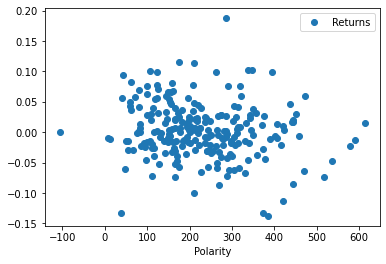

In [19]:
Sentiment_BitCoin_Score_new.plot(x='Polarity',y='Returns', style="o")

In [1]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'